<a href="https://colab.research.google.com/github/pearllpatell/Pearl_Patel_Portfolio/blob/main/Los%20Angeles%20Crime%20Rate%202020%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Background**

**State clearly why you chose the question you did and what the question is.**

What are the leading crime causes of Los Angeles since 2020?

**The data sources that you found that helped you answer your question.**

The data sources that were used are through data.gov. It is a file of over 900,000 rows describing every single crime that has happened since 2020. The data included the date, the time, the area, the type of crime, and more.

**Why these data sources (as compared to others) helped you to answer the question.**

This data source was way more helpful than others I was finding because it gave me loads of information. It also felt right to use real data that is being tracked in LA and being able to extract data from these sets.

## **Import Necessary Libararies**

Pandas: Used for data manipulation and analysis, providing structures like DataFrames for handling structured data.

Matplotlib: A plotting library for creating a wide variety of interactive and animated visualizations.

Seaborn: Built on Matplotlib, it offers advanced statistical data visualization capabilities.

NumPy: Essential for scientific computing, it supports large, multi-dimensional arrays and provides mathematical functions.

SciPy (specifically scipy.stats): Extends NumPy for scientific computing; includes functions for statistical tests, like the Chi-squared test.

datetime: Part of Python's standard library, used for manipulating and formatting dates and times.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime

## **Configure Visualizations**

In [ ]:
sns.set(style="whitegrid")

## **Loading the Datasets**

In [ ]:
cleandata_path = 'cleandata.csv'
crimedata_path = 'crimedata.csv'
cleandata_df = pd.read_csv(cleandata_path)
crimedata_df = pd.read_csv(crimedata_path)

<ipython-input-10-1dbe4bb5978e>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  crimedata_df = pd.read_csv(crimedata_path)


## **Data Parsing Function**

In [ ]:
def parse_data_crimedata(df):
    df['Date'] = pd.to_datetime(df['Date'])
    relevant_columns = ['Date', 'CRIME_TYPE', 'AREA_NAME']
    return df[relevant_columns]

## **Data Cleaning Function**

In [ ]:
def clean_data(df):
    df = df.dropna(subset=['Date', 'CRIME_TYPE', 'AREA_NAME'])
    df = df.drop_duplicates()
    return df

## **Trend Analysis Function**

In [ ]:
def trend_analysis_cleandata(df):
    df['Hour'] = df['TIME'] // 100
    crime_trends = df.groupby('Hour').size()
    plt.figure(figsize=(10, 6))
    crime_trends.plot(kind='bar')
    plt.title('Crime Distribution by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=0)
    plt.show()
    return crime_trends

## **Correlation Function**

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

## **Correlation between Neighborhoods and Crime Types**

In [ ]:
crime_neighborhood_correlation = cramers_v(crimedata_df['AREA_NAME'], crimedata_df['CRIME_TYPE'])
print(f"Correlation between Neighborhoods and Crime Types: {crime_neighborhood_correlation}")

Correlation between Neighborhoods and Crime Types: 0.08606164545145674


In the context of neighborhoods and crime types, a correlation coefficient of
0.086
0.086 suggests that there is only a very weak relationship between the type of neighborhood and the type of crime that occurs there. This means that the kind of neighborhood (whether it's in what neighborhood) has very little influence on the types of crimes that are most likely to occur there.

## **Grouping Crimes by Weapon Usage and Creating a Pie Chart**

In [ ]:
weapon_crimes = crimedata_df[crimedata_df['CRIME_TYPE'].str.contains("WEAPON", na=False)]
weapon_crime_counts = weapon_crimes['CRIME_TYPE'].value_counts()

## **Limiting the Number of Categories for the Pie Chart**

In [ ]:
top_categories = weapon_crime_counts.head(10)
top_categories['Other'] = weapon_crime_counts.iloc[10:].sum()

## **Plotting the pie chart for weapon-associated crimes**

**This Pie Chart shows the Top Associated Crimes. This means what crimes are the ones seen the most in LA and in the data.**


The pie chart depicting the top associated crimes in Los Angeles is significant as it guides law enforcement in resource allocation and strategy formulation. It informs policymakers and community organizations for targeted interventions and public awareness campaigns. Additionally, it aids researchers in understanding crime trends and causes. This data is pivotal for comparative analysis and emergency response planning, playing a crucial role in enhancing overall public safety and crime prevention efforts.

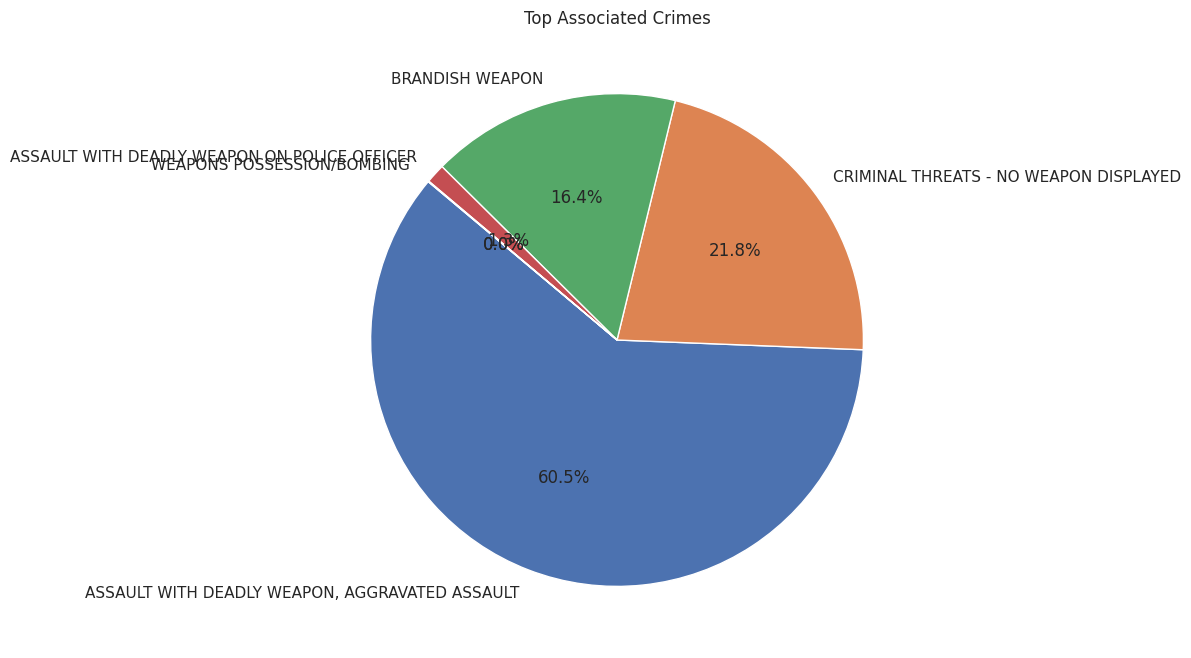

In [ ]:
plt.figure(figsize=(10, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top Associated Crimes')
plt.ylabel('')  # Hiding the y-label for better aesthetics
plt.show()

This Pie Chart Shows:

Assult with Deadly Weapon, Aggrevated Assult is the leading crime cause in LA the past 3 years, leading with 60.5 percent, followed by Criminal Threats with No Weapons Displayed.

This is a significant finding because it shows the leading cause and what is the leading cause. With this data, you can see that weapons are used often and hopefully, action can be taken.

## **Trends Over the Last Three Years**

This bar chart shows the trend over the last three years.


In 2022, crime rates went up a lot compared to 2020, when they were really low. This change might be because of COVID-19. During 2020, people stayed home a lot because of lockdowns, which probably led to fewer crimes. But in 2022, when life started to get back to normal, crime rates went up again. This could be because the pandemic caused problems like people losing jobs, which might lead to more crime in spites of anger. This shows how big events like a health crisis can really change crime rates.

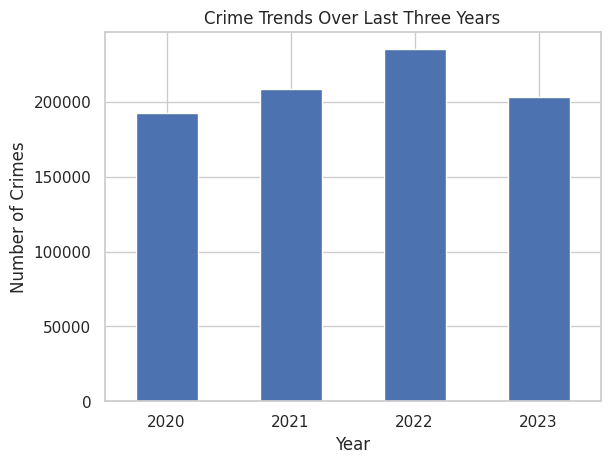

In [ ]:
crimedata_df['Year'] = pd.to_datetime(crimedata_df['Date']).dt.year
recent_crime_data = crimedata_df[crimedata_df['Year'] >= 2020]  # Adjust the year range as needed
yearly_crime_counts = recent_crime_data.groupby('Year').size()
yearly_crime_counts.plot(kind='bar')
plt.title('Crime Trends Over Last Three Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

The Bar Chart shows:

2022, with the highest number of crimes and 2020 with the lowest number of crimes. It also shows it decreasing again in 2023.

## **Parsing and Cleaning Crime Data**

In [ ]:
parsed_crimedata = parse_data_crimedata(crimedata_df)
cleaned_crimedata = clean_data(parsed_crimedata)

## **Displaying Parsed and Cleaned Crime Data**

In [ ]:
print("\nParsed Crime Data:")
print(parsed_crimedata.head())
print("\nCleaned Crime Data:")
print(cleaned_crimedata.head())



Parsed Crime Data:
        Date                                         CRIME_TYPE AREA_NAME
0 2020-01-07  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   Olympic
1 2020-01-27                                              ARSON   Central
2 2020-01-30                                              ARSON   Central
3 2020-02-02                                              ARSON    Harbor
4 2020-02-03                                              ARSON    Harbor

Cleaned Crime Data:
        Date                                         CRIME_TYPE AREA_NAME
0 2020-01-07  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   Olympic
1 2020-01-27                                              ARSON   Central
2 2020-01-30                                              ARSON   Central
3 2020-02-02                                              ARSON    Harbor
4 2020-02-03                                              ARSON    Harbor


## **Trend Analysis for Clean Data**

This bar chart below shows when the most crimes happen. You would expect it to be later in the night, but I was shocked when it showed that 12:00 PM was the highest time of crime. However, in this dataset, that could be wrong and just an automatic input of time when they don't know what time the crime occurred.

I wanted to research into this because then we can use more safety action at the times it needs it the most. Such as have more police around during the afternoons rather than early morning.


Trend Analysis for Clean Data:


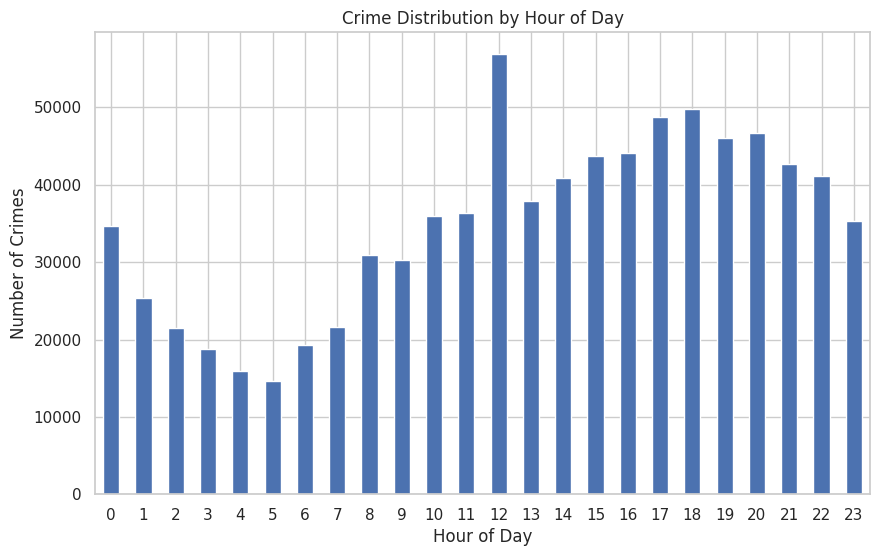

Hour
0     34628
1     25423
2     21510
3     18747
4     15888
5     14612
6     19262
7     21673
8     30976
9     30279
10    35938
11    36404
12    56869
13    37850
14    40849
15    43683
16    44053
17    48710
18    49804
19    46010
20    46663
21    42643
22    41130
23    35297
dtype: int64

In [ ]:
print("\nTrend Analysis for Clean Data:")
trend_analysis_cleandata(cleandata_df)

This Bar Chart Shows:

12:00pm is the highest time of crime, respectfully. 5:00am is the time of day that has the least amount of crime.

## **Next Steps:**

**Further action for the research**

1) Find more datasets and compare them to each year. Are the timings right in the Crime Distribution by Hour of Day. If it is true, find out what crimes happen around that time more and research into ways that could be prevented.

2) Research why 2022 had a peak over the last 4 years. Were the crimes out of aggression towards our economy, towards losing things that mattered most as we were redeeming from a pandemic? Did the pandemic have to do with the uprise of crimes.

3) Understand what weapons are being used and how to prevent them. This is not an easy step and I understand that, but small changes could happen and having more detections in larger masses.

**What could be done more?**

I personally would have taken time to answer more questions and create more graphs. I would have loved to answer questions such as what neighborhoods cause the most crime, what weapons are used in these crimes, what part of the dataset is unreliable?

I would have taken more time to make this neater and more organized as well. I would have done more research. I feel like 5 minutes to explain everything was making me confused on how to portray all my information.
